<a href="https://colab.research.google.com/github/sadidoll/Artifical-Interlligence/blob/master/HW3/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework 3**

###**Problem 1:**
Implement the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).

The entries of the arrays should be generated as follows. For each row i in {0, 1, ..., m-1}:
 
* Choose class label c=0 with probability 1/2 and c=1 with probability 1/2.
* Choose the first feature x_1 uniformly at random in the interval [0, 1).
* Set the second feature x_2 to be x_2 = w * x_1 + b + (-1)^c * n, where the "noise" n is chosen according to the normal distribution with mean mu and standard deviation sigma.
* The ith row of the array data consists of the features x_1 and x_2.
* The ith entry of the vector labels is the class label c.

Implement the function display_random_data that takes as input the above two arrays labels and data. It should create scatter plot of the 2D points stored in data. Use red dots to plot the points whose labels are 1 and blue dots to plot the points whose labels are 0.

Hints: You should see that the 2D points (feature vectors) corresponding to different classes are approximately separated by the line y = w * x + b, where w and b are the parameters that you used to generate the data. Note that the smaller the parameter mu, the closer the points are to this line. Also, the larger the parameter sigma, the more points can be on the wrong side of this line.

Experiment with different values of mu and sigma. Make sure that the parameter m is large enough so you have enough data points.

Split the data/labels into a training set (80%) and a test set (20%).

**Imports**

In [0]:
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
import sys 
from sklearn.model_selection import train_test_split

**Function for random data generation**

In [0]:
def get_random_data(w, b, mu, sigma, m):
 
  # Generating first feature x_1 uniformly at random 
  x_1 = np.random.uniform(0, 1, size=(m,1))
  # Generating the label array with zeros and ones
  labels = np.random.choice([0,1], size=(m,1))
  # n is chosen according to the normal distribution with mean mu and standard deviation sigma
  # Genreating random data 
  n = np.random.normal(mu, sigma, size=(m,1))

  # Setting the second feature x_2
  x_2 = w * x_1 + b + (-1)** labels * n

  # Concatenating x_1 and x_2 fatures
  data = np.concatenate((x_1,x_2), axis = 1)

  return data,labels  

**Function for Random data display**

In [0]:
def display_random_data(labels, data, w, b):
  data = np.array(data)
  labels = np.array(labels)
  plt.figure()
  j = labels.flatten()
  #for x in range(0,m):

  # if label is 0 then blue points if 1 be red points
  data_0 = data[j == 0,:]
  plt.scatter(data_0[:,0],data_0 [:,1], c = 'blue', label = 'Class 0')
  data_1 = data[j == 1,:]
  plt.scatter(data_1[:,0],data_1 [:,1], c = 'red', label = 'Class 1')

  # Plot the true line
  x = np.linspace(0,1)
  y = w * x + b

  plt.plot(x, y,'black')
  plt.title('Randomly Generated Data')
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')

**Testing the functions with a test case**

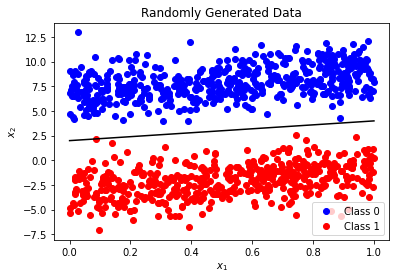

In [155]:
# Display the data
mu = 5
sigma = 1.5
m = 1000
w = 2
b = 2

# Calling all the funtions
data, labels = get_random_data(w, b, mu, sigma, m)
display_random_data(labels,data, w, b)
plt.legend()
plt.show()

# Splits the data
# Source: https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2)

###**Problem 2:**
Create a Keras to implement logistic regression with two features and train it with the data generated in Problem 1. The loss should be the binary cross entropy loss.

How well does the trained model separate the red and blue dots? You can obtain the separating line determined by the model by extracting the weights from the dense layer using the function get_weights. See https://keras.io/layers/about-keras-layers/.

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model. Make sure that you describe in detail in your notebook how you proceed to obtain the separating line.

Note that you have to carry out some simple steps to obtain the separating line from the model weights (the two weights and the bias term of the dense layer). This is not immediately obvious. It maybe helpful to take a look at the heatmap below.

The trained model realizes function f : R^2 -> R that takes two features as input and outputs a number in the interval [0, 1]. Use a heatmap to visualize this function.

**Imports**

In [0]:
import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import initializers
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import optimizers

**Building the Model and Performing the training**

In [158]:
# Defining the model
keras_model = Sequential()
# Adding a dense layer to the model
keras_model.add(Dense(1,input_shape = (2,), activation = 'sigmoid', bias_initializer=initializers.Constant(1),))
# Compliing the network
keras_model.compile(optimizer='rmsprop', loss ='binary_crossentropy', metrics = ['accuracy'])

#w = keras_model.layers[0].get_weights()[0]
#b = keras_model.layers[0].get_weights()[1]
#print(w)
#print(b)
# Compiling and training the model on the data
#epochs = 100
#batch_size = 512

# Training the model with epochs = 100 and batch size = 512 so that the accuray is high 
keras_model.summary()
history = keras_model.fit(train_data,train_labels,epochs = 100, batch_size = 512,
                          validation_data = (test_data,test_labels))



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 0s 46ms/step - loss: 0.7668 - accuracy: 0.4812 - val_loss: 0.7636 - val_accuracy: 0.4600
Epoch 2/100
2/2 [==============================] - 0s 18ms/step - loss: 0.7448 - accuracy: 0.4812 - val_loss: 0.7507 - val_accuracy: 0.4600
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 0.7331 - accuracy: 0.4812 - val_loss: 0.7400 - val_accuracy: 0.4600
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 0.7163 - accuracy: 0.4812 - val_loss: 0.7307 - val_accuracy: 0.4600
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 0.7196 - accuracy: 0.4

In order to create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model. Below is the equation to obtain the separating line.

### y = wx + b
### ${y= w_1x_1 + w_2x_2 + b}$ 
### ${0= w_1x_1 + w_2x_2 + b}$ 
Now, solve for ${x_2}$

###${x_2}$= $- {\frac{w_1x_1 + b}{w_2}}$

###${w = -(\frac {w_1}{w_2})}$

###${b = - (\frac {b}{w_2})}$

**Function that will display the data with prediction and actual separating line**

[array([[ 0.33748937],
       [-0.24518184]], dtype=float32), array([0.80504245], dtype=float32)]


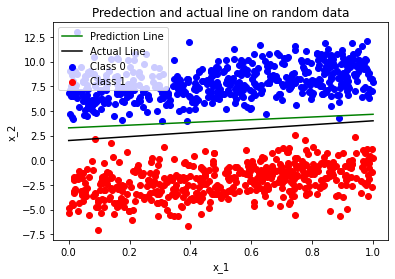

In [159]:
def prediction_line_display(data, labels, pred_w, pred_b, w, b):
  shape = labels.flatten()
  # Class 0 array, which has to be ploted and displayed as blue dots
  data_0 = data[shape == 0,:]
  plt.scatter(data_0[:,0],data_0 [:,1], c = 'blue', label = 'Class 0')
  # Class 1 array, which has to be plotted and displayed as red dots
  data_1 = data[shape == 1,:]
  plt.scatter(data_1[:,0],data_1 [:,1], c = 'red', label = 'Class 1')

# To display the prediction line
  x = np.linspace(0, 1, 100)
  pred_y = pred_w * x + pred_b # formula 

  # To display Actual line
  y = w * x + b
  plt.plot(x, pred_y, c = 'green', label = 'Prediction Line')
  plt.plot(x, y, c = 'black', label = 'Actual Line')

  plt.title('Predection and actual line on random data')
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.legend()
  plt.show()
  return

# Getting weight from the model
weights_p2 = keras_model.get_weights()

weight_1 = weights_p2[0][0]
weight_2 = weights_p2[0][1]
bias  = weights_p2[1][0]

print(weights_p2)
# The prediction weight and bias term in order to seperate line
pred_w = -(weight_1 / weight_2)
pred_b = -(bias / weight_2)

prediction_line_display(data,labels, pred_w, pred_b,w , b)

**Function to display the heatmap made from the prediction from the model**

In [0]:
def prediction_heatmap(data):
  # Defining the heatmap region
  x_heatmap = np.linspace(0,1,100)
  y_max = max(data[:,1])
  y_min = min(data[:,1])
  y_heatmap = np.linspace(y_min, y_max, 100)
  X, Y = np.meshgrid(x_heatmap, y_heatmap)

  # creates Z values based on x,y grid

  Z = keras_model.predict(np.c_[X.ravel(), Y.ravel()])
  Z = Z.reshape(X.shape)

  # Configuring the plot
  fig = plt.figure()
  ax = plt.axes()
  contours = ax.contourf(X, Y, Z, 100, cmap='RdBu_r')
  i = ax.imshow(Z, extent=[0, 1, y_min, y_max], cmap='RdBu_r', alpha=0.5, aspect='auto')

  # Giving a colorbar
  plt.colorbar(i, ax= ax)

  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')
  ax.set_title("Heatmap for the Keras model")
  plt.show()
  return

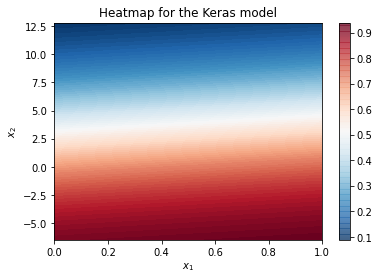

In [198]:
prediction_heatmap(data)

###**Problem 3:**
Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.

Hints: Look at the notes on logistic regression to figure out what the gradient is of the binary cross entropy loss with respect to w and b. Note that you only have to implement stochastic gradient, that is, you do not have to write vectorized code for mini-batch gradient descent.

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model.

Use a heatmap to visualize the function defined by your trained model.

You also have to compute the binary cross entropy loss and accuracy on the test set

In [0]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [0]:
# Getting data from problem 1 with sample data
mu = 5
sigma = 1.5
m = 1000
w = 2
b = 2


#epochs = 20
#learning_rate = 0.01

data, labels = get_random_data(w,b,mu,sigma,m)
#train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels)

**Functions that will be used by the Model**

In [0]:
# Function that performs sigmoid activation on a given input
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Calculates the binary cross entropy loss 
def binary_cross_entropy_loss(pred_a, pred_label):
    return (-pred_label * np.log(pred_a)) - ((1 - pred_label) * np.log(1 - pred_a))

# Performing a test for the model using inputs as test labels and data with weights
def model_test(test_data, test_labels, weights):
  loss_in_total = 0
  pred_correct = 0

  for i in range(len(test_data)):
    # Processing the input
    X = np.concatenate(([1], test_data[i]))
    z = weights.T.dot(X)
    a = sigmoid(z)
    # MAking a prediction 
    if(a < .5 and test_labels[i] == 0) or (a >= .5 and test_labels[i] == 1):
      pred_correct += 1
    
    # Calculating the loss
    loss_in_total += binary_cross_entropy_loss(a, test_labels[i])
  #print(loss_in_total)
  
  # Return summary
  return (loss_in_total[0] / len(test_data), pred_correct / len(test_data))

# Computes the logistic regression
def logistic_regression_model(train_data, train_labels, test_data, test_labels, epochs, learing_rate):
  # Randomizing the initial weights
  weights = np.random.random_sample((3,))
  
  for epoch in range(epochs):
    # This is performing only Stochastic gradient descent
    for i in range(len(train_data)):
      # Processing the input
      X = np.concatenate(([1], train_data[i]))
      z = weights.T.dot(X)
      a = sigmoid(z)

      # Determining the gradient of the loss
      loss_gradient = (a - train_labels[i]) * X

      # Applying gradient to the weights
      weights -= loss_gradient * learning_rate
    # For each epoch, analyze the accuracy and loss for it.
    loss,accuracy = model_test(test_data, test_labels,weights)
    print(f'Epoch {epoch+1}/{epochs} -> Loss: {loss} , Accuracy: {accuracy}')
  # Returning the trained weights
  return weights
    

**Testing the function**

Epoch 1/20 -> Loss: 0.07441424298809063 , Accuracy: 0.983
Epoch 2/20 -> Loss: 0.05498393920419539 , Accuracy: 0.989
Epoch 3/20 -> Loss: 0.04431534527148295 , Accuracy: 0.993
Epoch 4/20 -> Loss: 0.03727998048225585 , Accuracy: 0.993
Epoch 5/20 -> Loss: 0.032246135208708816 , Accuracy: 0.995
Epoch 6/20 -> Loss: 0.028464116993241573 , Accuracy: 0.995
Epoch 7/20 -> Loss: 0.025523710079644518 , Accuracy: 0.995
Epoch 8/20 -> Loss: 0.023176662830856787 , Accuracy: 0.995
Epoch 9/20 -> Loss: 0.021262718605534393 , Accuracy: 0.995
Epoch 10/20 -> Loss: 0.01967366630751722 , Accuracy: 0.995
Epoch 11/20 -> Loss: 0.018333930431394804 , Accuracy: 0.997
Epoch 12/20 -> Loss: 0.017189284110853482 , Accuracy: 0.998
Epoch 13/20 -> Loss: 0.016199925176996723 , Accuracy: 0.998
Epoch 14/20 -> Loss: 0.01533605639149877 , Accuracy: 0.998
Epoch 15/20 -> Loss: 0.014574975665455346 , Accuracy: 0.998
Epoch 16/20 -> Loss: 0.013899111489945356 , Accuracy: 0.998
Epoch 17/20 -> Loss: 0.013294667704448255 , Accuracy: 0

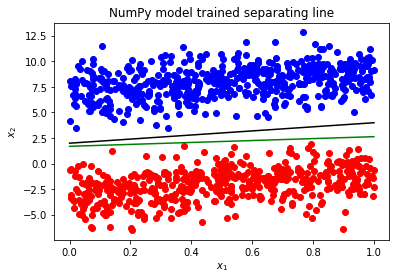

In [185]:
epochs = 20
learning_rate = 0.01

weights = logistic_regression_model(train_data, train_labels,test_data,test_labels,epochs,learning_rate)

display_random_data(labels,data,w,b)
xline = np.linspace(0, 1, 100)
yline = -((weights[1] * xline + weights[0])/ weights[2])
plt.plot(xline, yline, color='green')
plt.title('NumPy model trained separating line')
plt.show()

**Function for heatmap for problem 3**

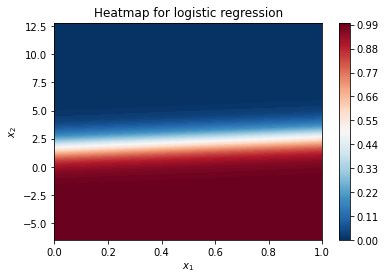

In [190]:
def prediction_heatmap_p3():
  # Defining the heatmap region
  x_heatmap = np.linspace(0,1,100)
  y_max = max(data[:,1])
  y_min = min(data[:,1])
  y_heatmap = np.linspace(y_min, y_max, 100)
  X, Y = np.meshgrid(x_heatmap, y_heatmap)

 # Configure the plot
  ax = plt.axes()
  ax.set_xlabel('$x_1$')
  ax.set_ylabel('$x_2$')

  # Calling the sigmoid function with computed weights
  Z = sigmoid(weights[1] * X + weights[2] * Y + weights[0])
  
  # Displays the heatmap plane
  plt.contourf(X, Y, Z, 100, cmap='RdBu_r')
  plt.title('Heatmap for logistic regression')
  
  plt.colorbar()
  plt.show()

prediction_heatmap_p3()
